# Representation of signals & inverse problems - G1-G2
---
## Guidelines (read carefully before starting)

**Objective**: This practical session is composed of a few revision exercises about the 2D Fourier transform, relying on the Fast Fourier Transform (FFT) algorithm.

## Configuration

In [ ]:
# make sure the notebook reloads the module each time we modify it
%load_ext autoreload
%autoreload 2

# Uncomment the next line if you want to be able to zoom on plots (one of the options below)
# %matplotlib widget
%matplotlib inline
# %matplotlib notebook

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.image as mpimg
import numpy as np

>[Representation of signals & inverse problems - G1-G2](#scrollTo=dS31vOr2Lew6)

>>[Guidelines (read carefully before starting)](#scrollTo=dS31vOr2Lew6)

>>[Configuration](#scrollTo=XtEku-d1Lew8)

>>[Fourier analysis of an image](#scrollTo=00W_jfo0Lew-)

>>>[Loading an image](#scrollTo=nzweiF-SLew-)

>>>[Displaying the absolute value of its Fourier transform](#scrollTo=4hZjRLyVLexA)

>>>[Question 1  (↑)](#scrollTo=N17CgWWlLexB)

>>>[Question 2  (↑)](#scrollTo=rkKsHAlqLexC)

>>>[Question 3  (↑)](#scrollTo=CR-BNdyRLexD)

>>>[Exercise 1  (↑)](#scrollTo=7c3T-ojRLexE)

>>>[Exercise 2  (↑)](#scrollTo=Sh8wTOxYLexH)



## Fourier analysis of an image

### Loading an image

In [ ]:
I = mpimg.imread("/content/cameraman.png")

In [ ]:
print("Shape: {0}, max: {1}".format(len(I.shape), np.max(I)))

Shape: 2, max: 1.0


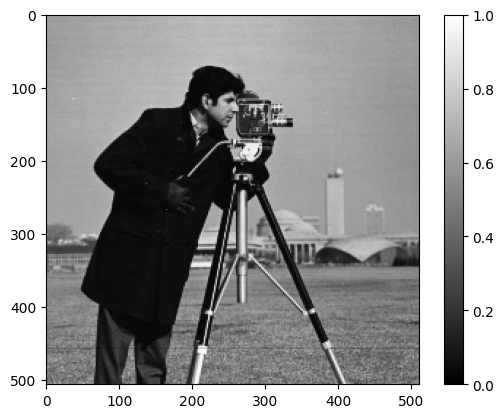

In [ ]:
plt.figure()
plt.imshow(I, cmap="gray")
plt.colorbar()
plt.show()

### Displaying the absolute value of its Fourier transform

**Remark:** the function `np.fft.fftshift` ([documentation here](https://numpy.org/doc/stable/reference/generated/numpy.fft.ifftshift.html)) modifies the order of the coefficients so that the pixels associated with the (0, 0) frequency is located at the center of the image, for this question in position (256, 256).

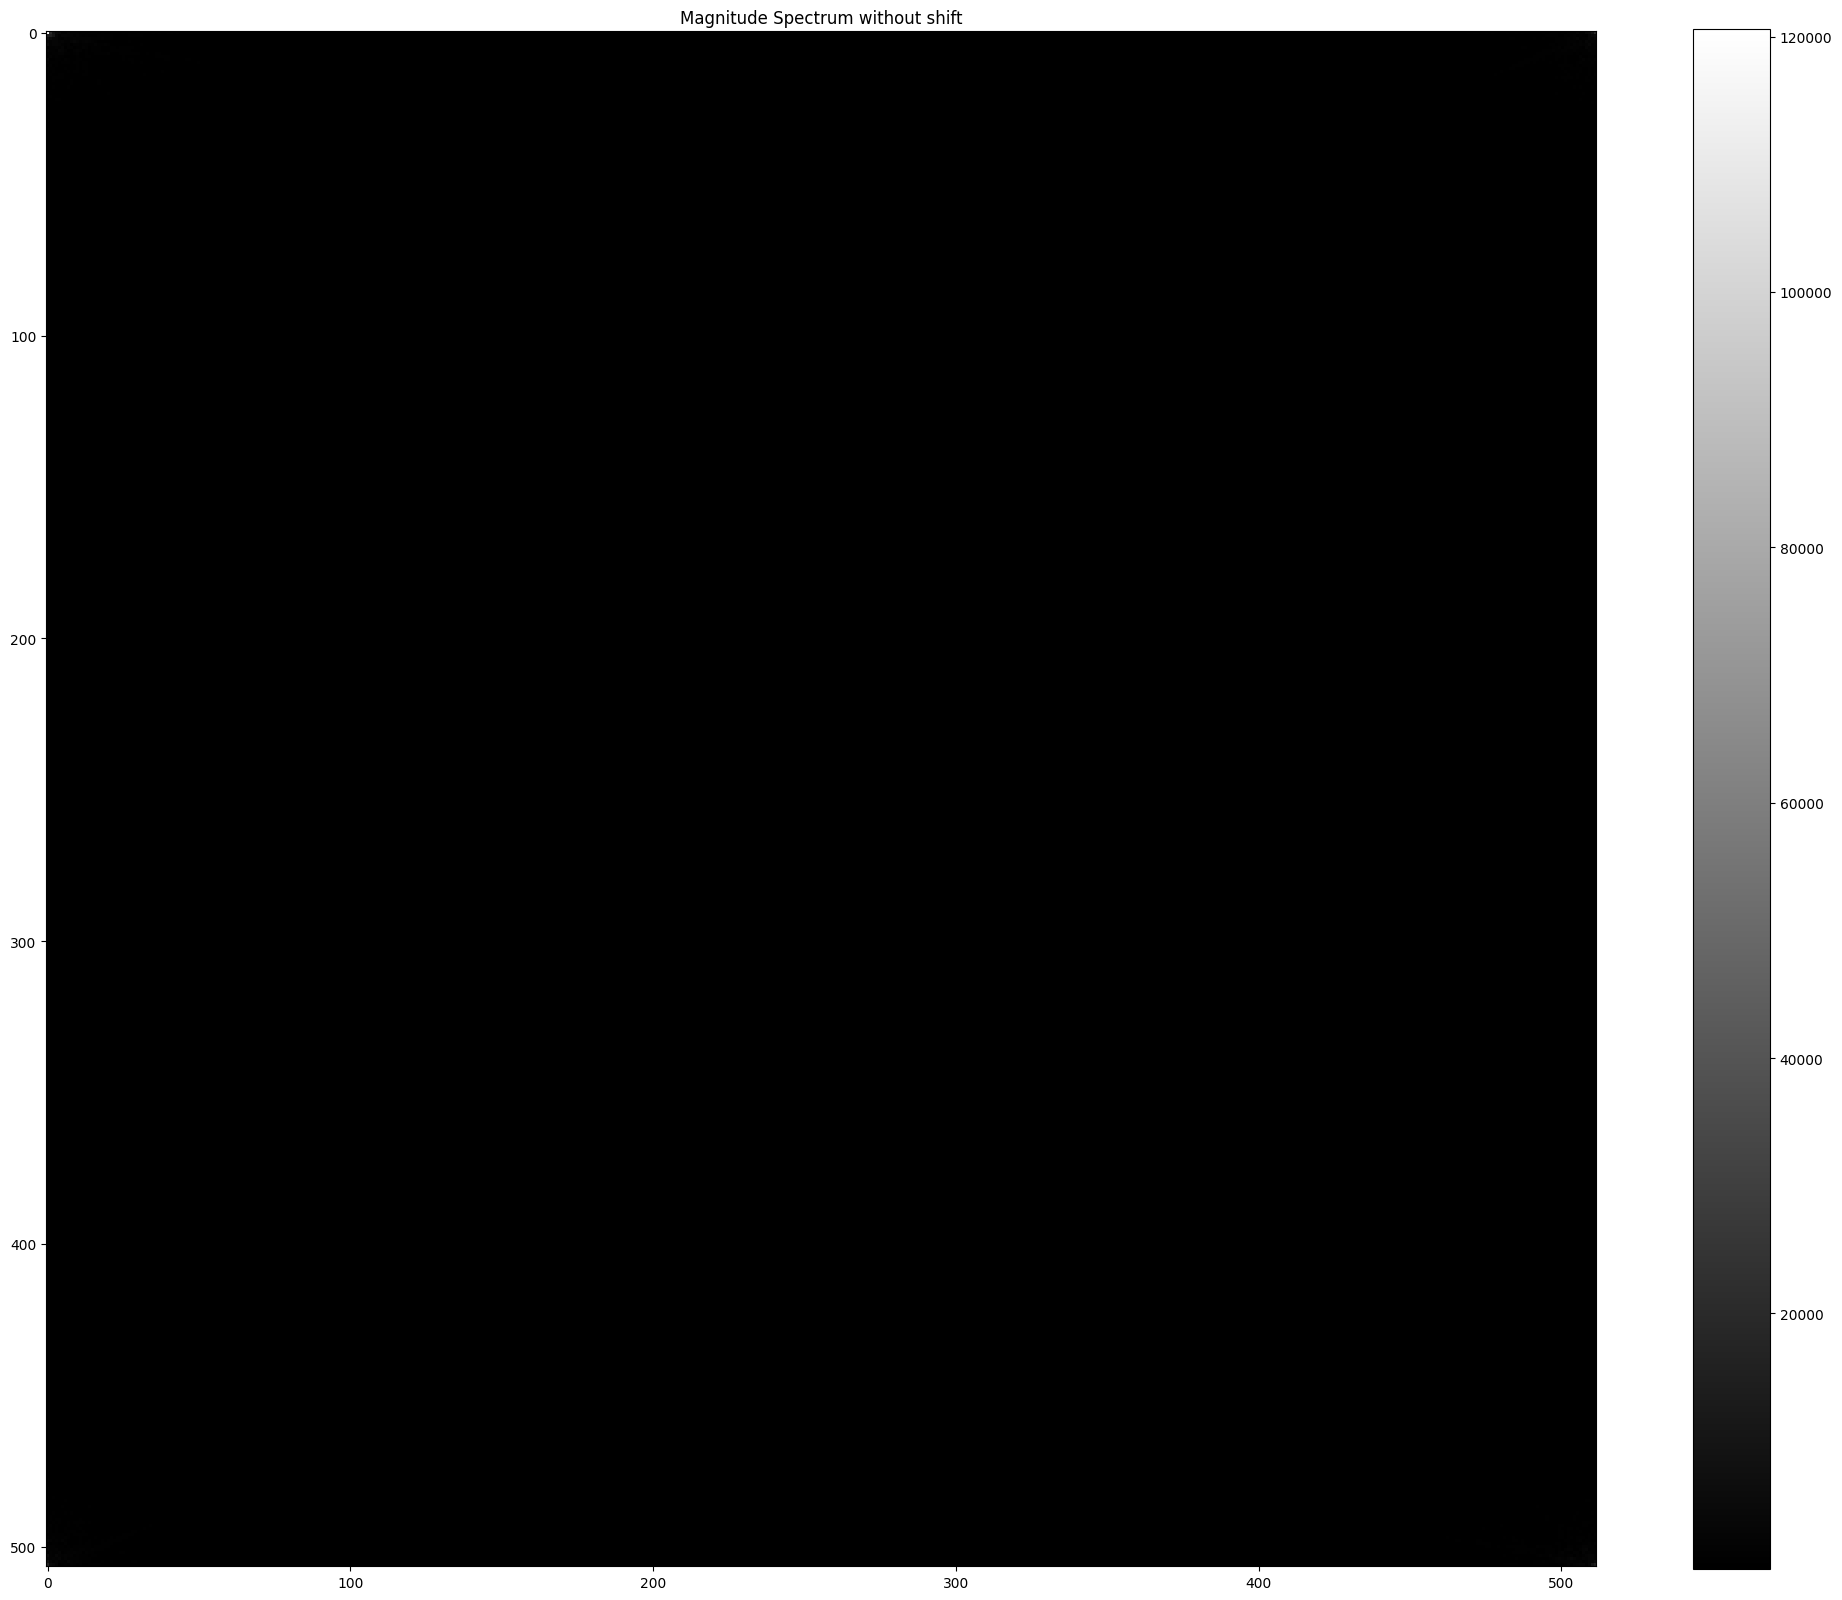

In [ ]:
fft2_img = np.fft.fft2(I)
fft2_img_shift = np.fft.fftshift(fft2_img)

plt.figure(figsize=(25,20))
plt.imshow(np.abs(fft2_img), cmap="gray")  # cmap = 'nipy_spectral'
plt.title("Magnitude Spectrum without shift")
plt.colorbar()
plt.show()

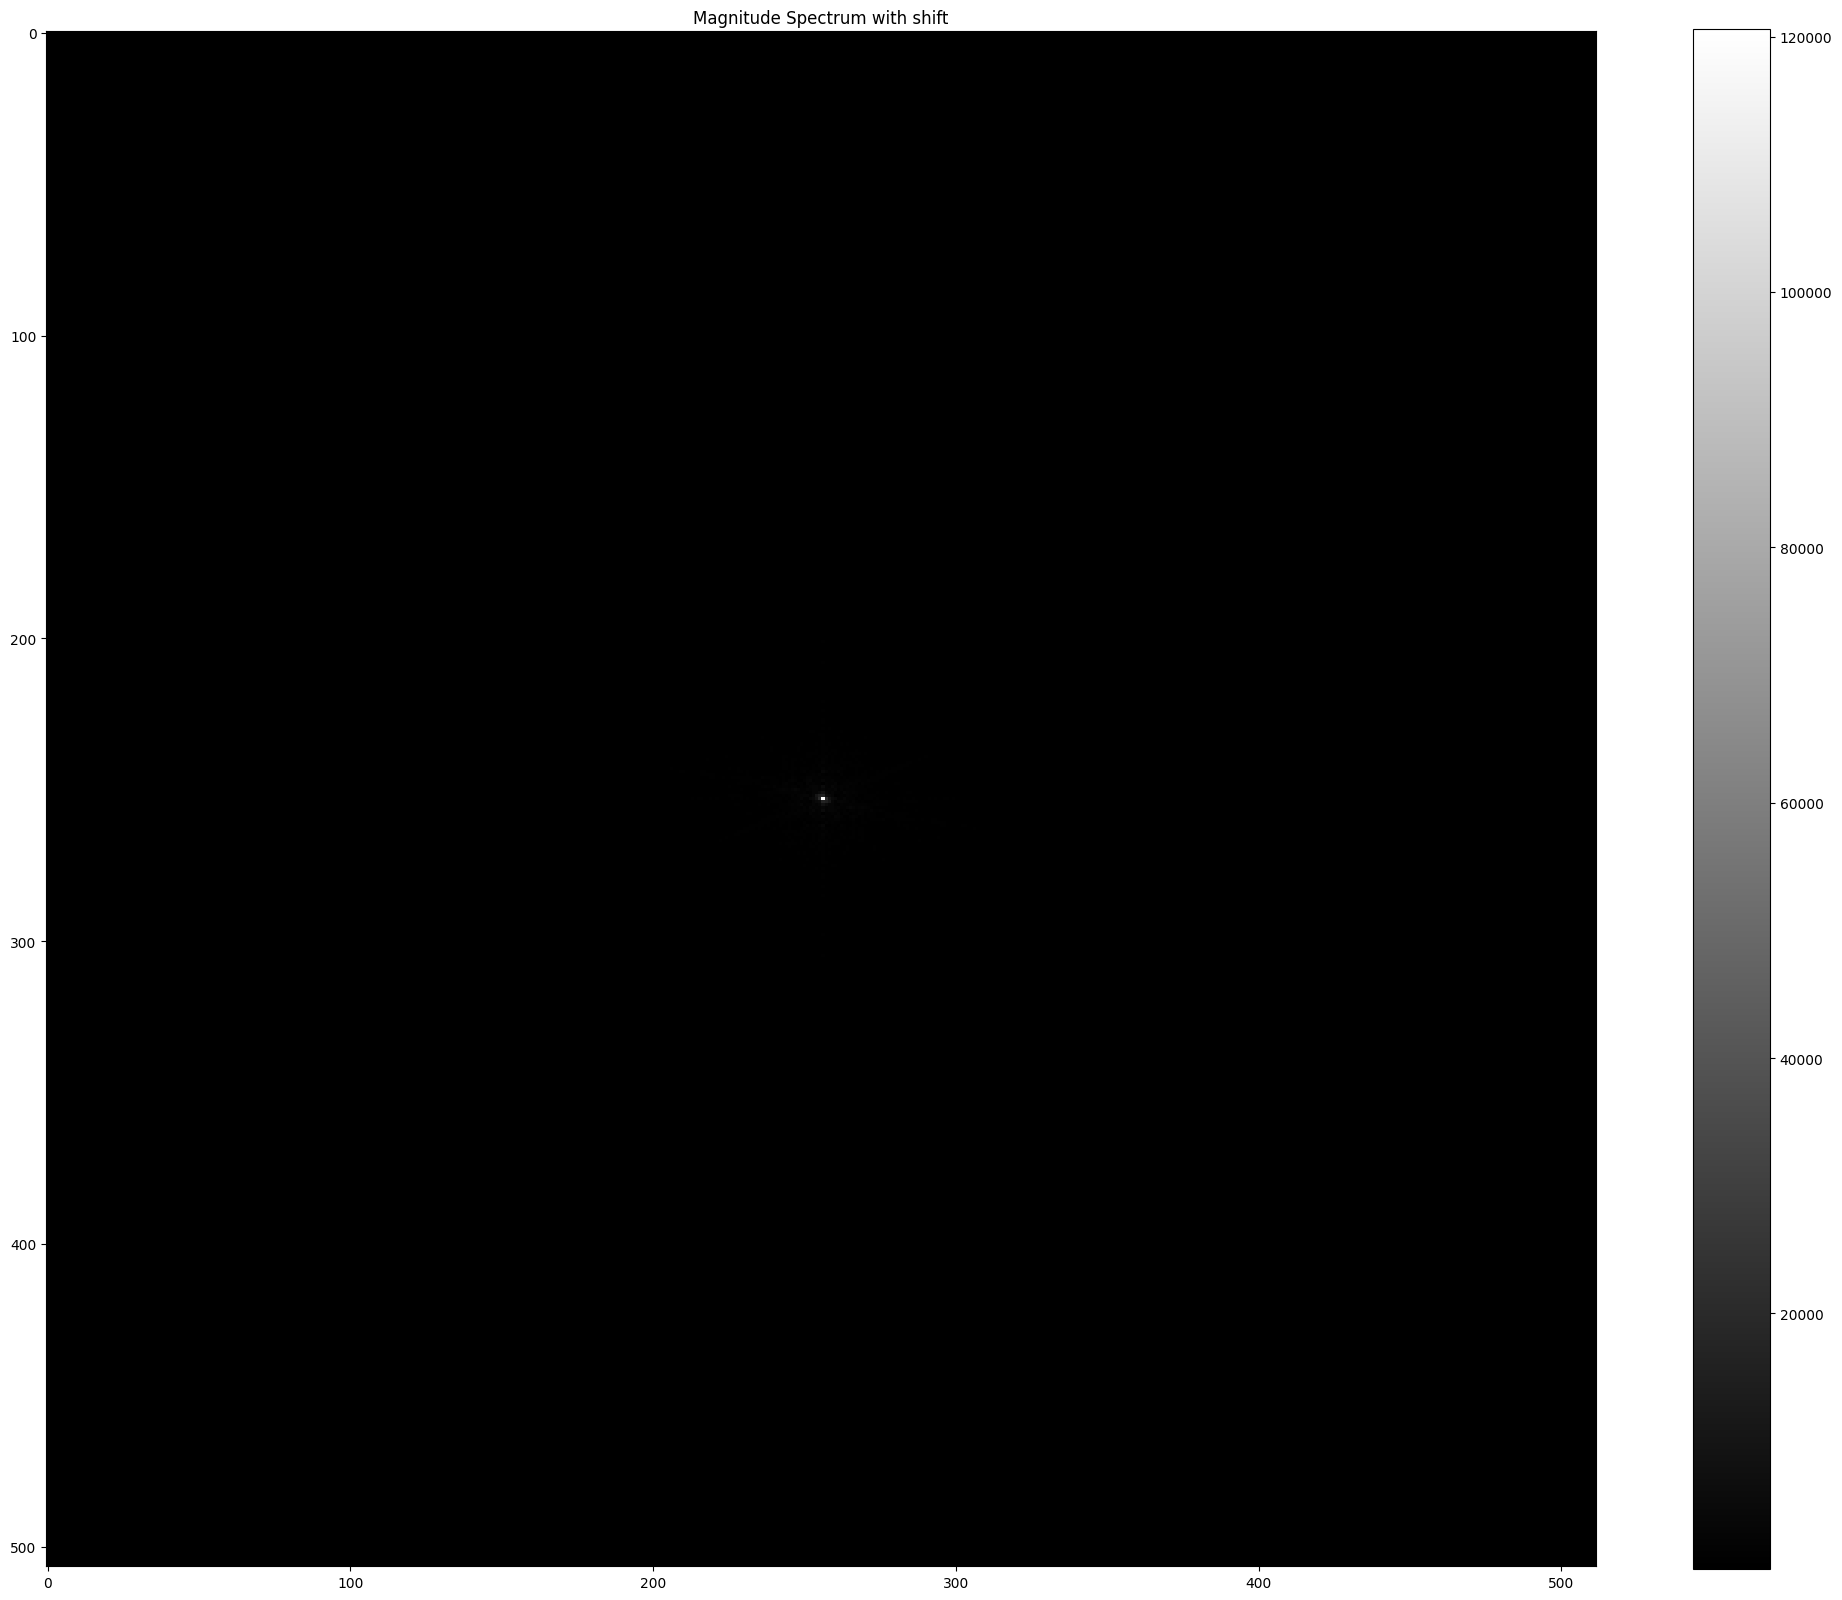

In [ ]:
plt.figure(figsize=(25,20))
plt.imshow(np.abs(fft2_img_shift), cmap="gray")
plt.title("Magnitude Spectrum with shift")
plt.colorbar()
plt.show()

----
### Question 1 <a name="question1"></a> [(&#8593;)](#content)
What do you notice with the above representation? Is it relevant? How could it possibly be improved?

> *Indication*: zoom on the center of the image. Describe what you observe and comment.

**Answer :** This representation is irrelevant because the value of the (0,0) frequency (sum of all the pixels) is way above all the other fft components, thus displayed in black without any contrast.

---
To improve the contrast, we will adopt a logarithmic scale to dislay intensity of the pixels: `norm=mpl.colors.LogNorm()`

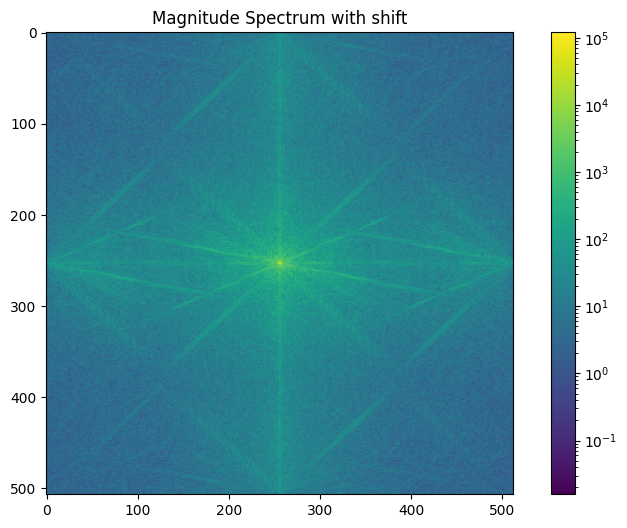

In [ ]:
plt.figure(figsize=(10, 6))
plt.imshow(
    np.abs(fft2_img_shift),
    cmap="viridis",
    norm=mpl.colors.LogNorm(),)  # cmap = 'nipy_spectral'
plt.title("Magnitude Spectrum with shift")
plt.colorbar()
plt.show()

----
### Question 2 <a name="question2"></a> [(&#8593;)](#content)

2.1. Take a look at the images from the `img` folder. Display the absolute value of the Fourier transform for 2 different images.

2.2. Comment on the distribution of high intensity pixels in the Fourier domain, and relate your observations to the spatial content of the image (*i.e.*, in the original domain)?

**Answers**

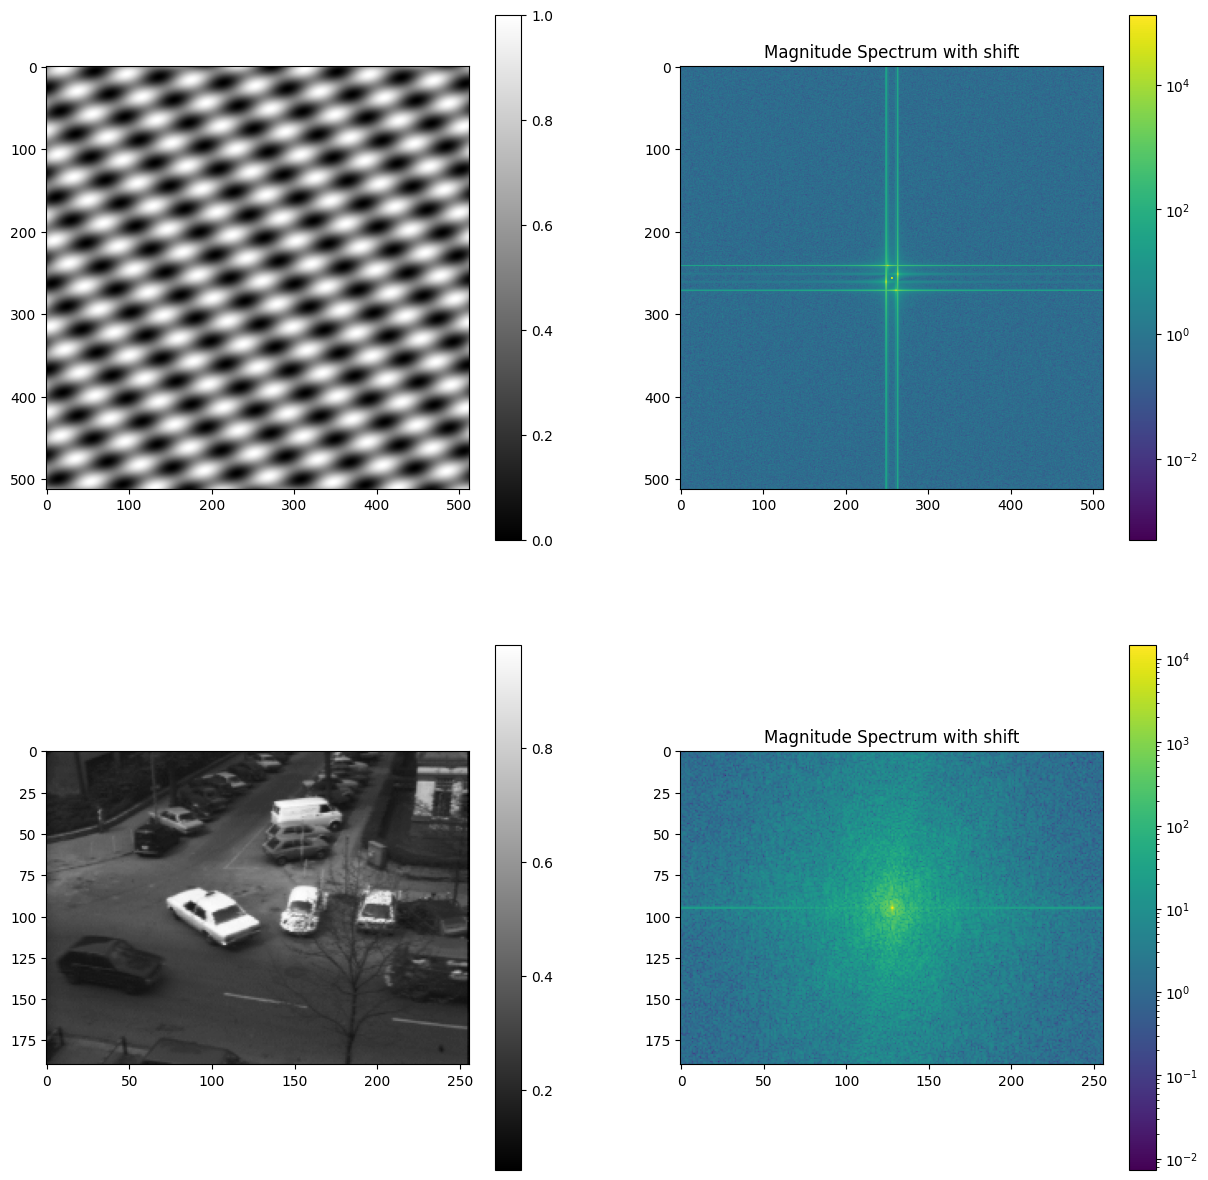

In [ ]:
# 2.1.

plt.figure(figsize=(15, 15))
plt.subplot(221)
plt.imshow(mpimg.imread("/content/periodic_bumps.png"), cmap="gray")
plt.colorbar()

plt.subplot(222)
plt.imshow(np.abs(np.fft.fftshift(np.fft.fft2(mpimg.imread("/content/periodic_bumps.png")))),
    cmap="viridis",
    norm=mpl.colors.LogNorm(),)  # cmap = 'nipy_spectral'
plt.title("Magnitude Spectrum with shift")
plt.colorbar()


plt.subplot(223)
plt.imshow(mpimg.imread("/content/taxi1.png"), cmap="gray")
plt.colorbar()

plt.subplot(224)
plt.imshow(
    np.abs(np.fft.fftshift(np.fft.fft2(mpimg.imread("/content/taxi1.png")))),
    cmap="viridis",
    norm=mpl.colors.LogNorm(),)  # cmap = 'nipy_spectral'
plt.title("Magnitude Spectrum with shift")
plt.colorbar()
plt.show()

2.2. High-density pixels form lines in the Fourier domain. The more regular patterns an image contains, the fewer lines are formed by high-density pixels in the Fourier domain. Furthermore, for each image, the highest concentration of high-intensity pixels is in the center of the representation in the Fourier domain.

----
### Question 3 <a name="question3"></a> [(&#8593;)](#content)

3.1 Compare the Fourier transform of an image `I` and `J = I - np.mean(img)` (`J` has zero mean).

3.2 Comment specifically on the amplitude of the frequency component (0, 0).

**Answers**

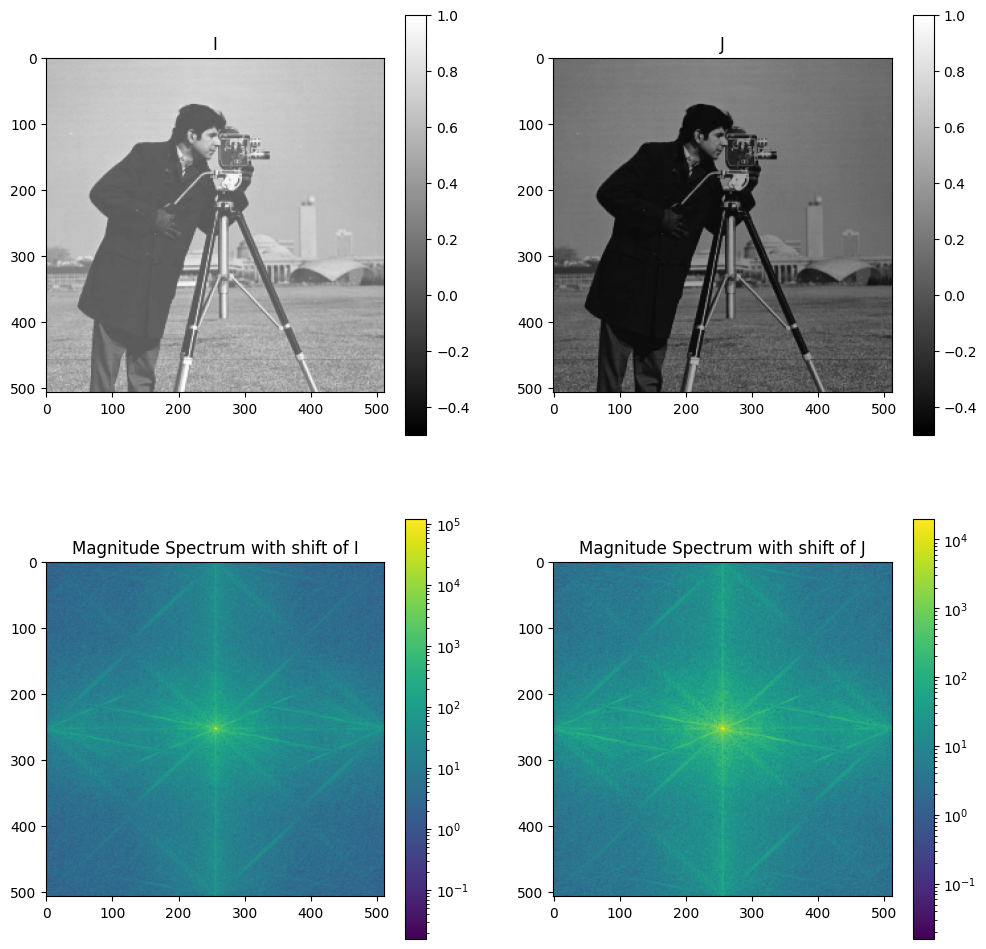

In [ ]:
# 3.1

filename = "/content/cameraman.png"
I = mpimg.imread(filename)
J = I - np.mean(I)
K = np.concatenate((I, J), axis=1)

fft2_img_I = np.fft.fft2(I)
fft2_img_shift_I = np.fft.fftshift(fft2_img_I)
fft2_img_J = np.fft.fft2(J)
fft2_img_shift_J = np.fft.fftshift(fft2_img_J)

plt.figure(figsize=(12,12))

plt.subplot(221)
plt.imshow(I, cmap="gray", vmin=-0.5, vmax=1)
plt.title("I")
plt.colorbar()

plt.subplot(222)
plt.imshow(J, cmap="gray", vmin=-0.5, vmax=1)
plt.title("J")
plt.colorbar()

plt.subplot(223)
plt.imshow(
    np.abs(fft2_img_shift_I),
    cmap="viridis",
    norm=mpl.colors.LogNorm(),)  # cmap = 'nipy_spectral'
plt.title("Magnitude Spectrum with shift of I")
plt.colorbar()

plt.subplot(224)
plt.imshow(
    np.abs(fft2_img_shift_J),
    cmap="viridis",
    norm=mpl.colors.LogNorm(),)  # cmap = 'nipy_spectral'
plt.title("Magnitude Spectrum with shift of J")
plt.colorbar()
plt.show()


3.1. The Fourier transform of J offers more contrast than the Fourier transform of I. Subtracting the mean image facilitates patterns recognition (cf. cell above).

In [ ]:
# 3.2

print(np.abs(fft2_img_I)[0][0])
print(np.abs(fft2_img_J)[0][0])

120607.7683339268
0.01685558259487152



3.2. By subtracting the mean image, the amplitude of the frequency component (0,0) is now equal to zero (cf. cell above).

----
### Exercise 1 <a name="exo1"></a> [(&#8593;)](#content)

1\. What does the bright pixel observed at the center of many of the figures representing the absolute value of the Fourier transform of a natural image?

2\. Check that the 2D Fourier transform is separable, *i.e.*, that it can be computed with the succesive application of two 1D Fourier transforms (along the horizontal axis and then the vertical axis, or in the opposite order).

3\. Build an image composed of black and white stripes, and study its Fourier transform. Modify the size of the stripes, and comment on your obsevations.

4\. Define a $512 \times 512$ matrix containing only zeros. Set to 1 two pixels located in two positions which are symmetric with respect to the center of the image. Take the inverse Fourier transform of this image (using `np.fft.ifftshift` and `np.fft.ifft2`). Observe et comment.

**Answers**

1. The bright pixel is the sum of the values of all the pixels of the image.

In [ ]:
# 2.

filename = "/content/cameraman.png"
I = mpimg.imread(filename)

J1 = np.fft.fft(I, n=None, axis=-1, norm=None)   # vertical 1D FFT
J1 = np.fft.fft(J1, n=None, axis=-2, norm=None)  # horizontal 1D FFT

J2 = np.fft.fft2(I)

print(np.linalg.norm(J2-J1, 'fro'))

0.0



2. The 2D Fourier transform is indeed separable (cf. cell above).

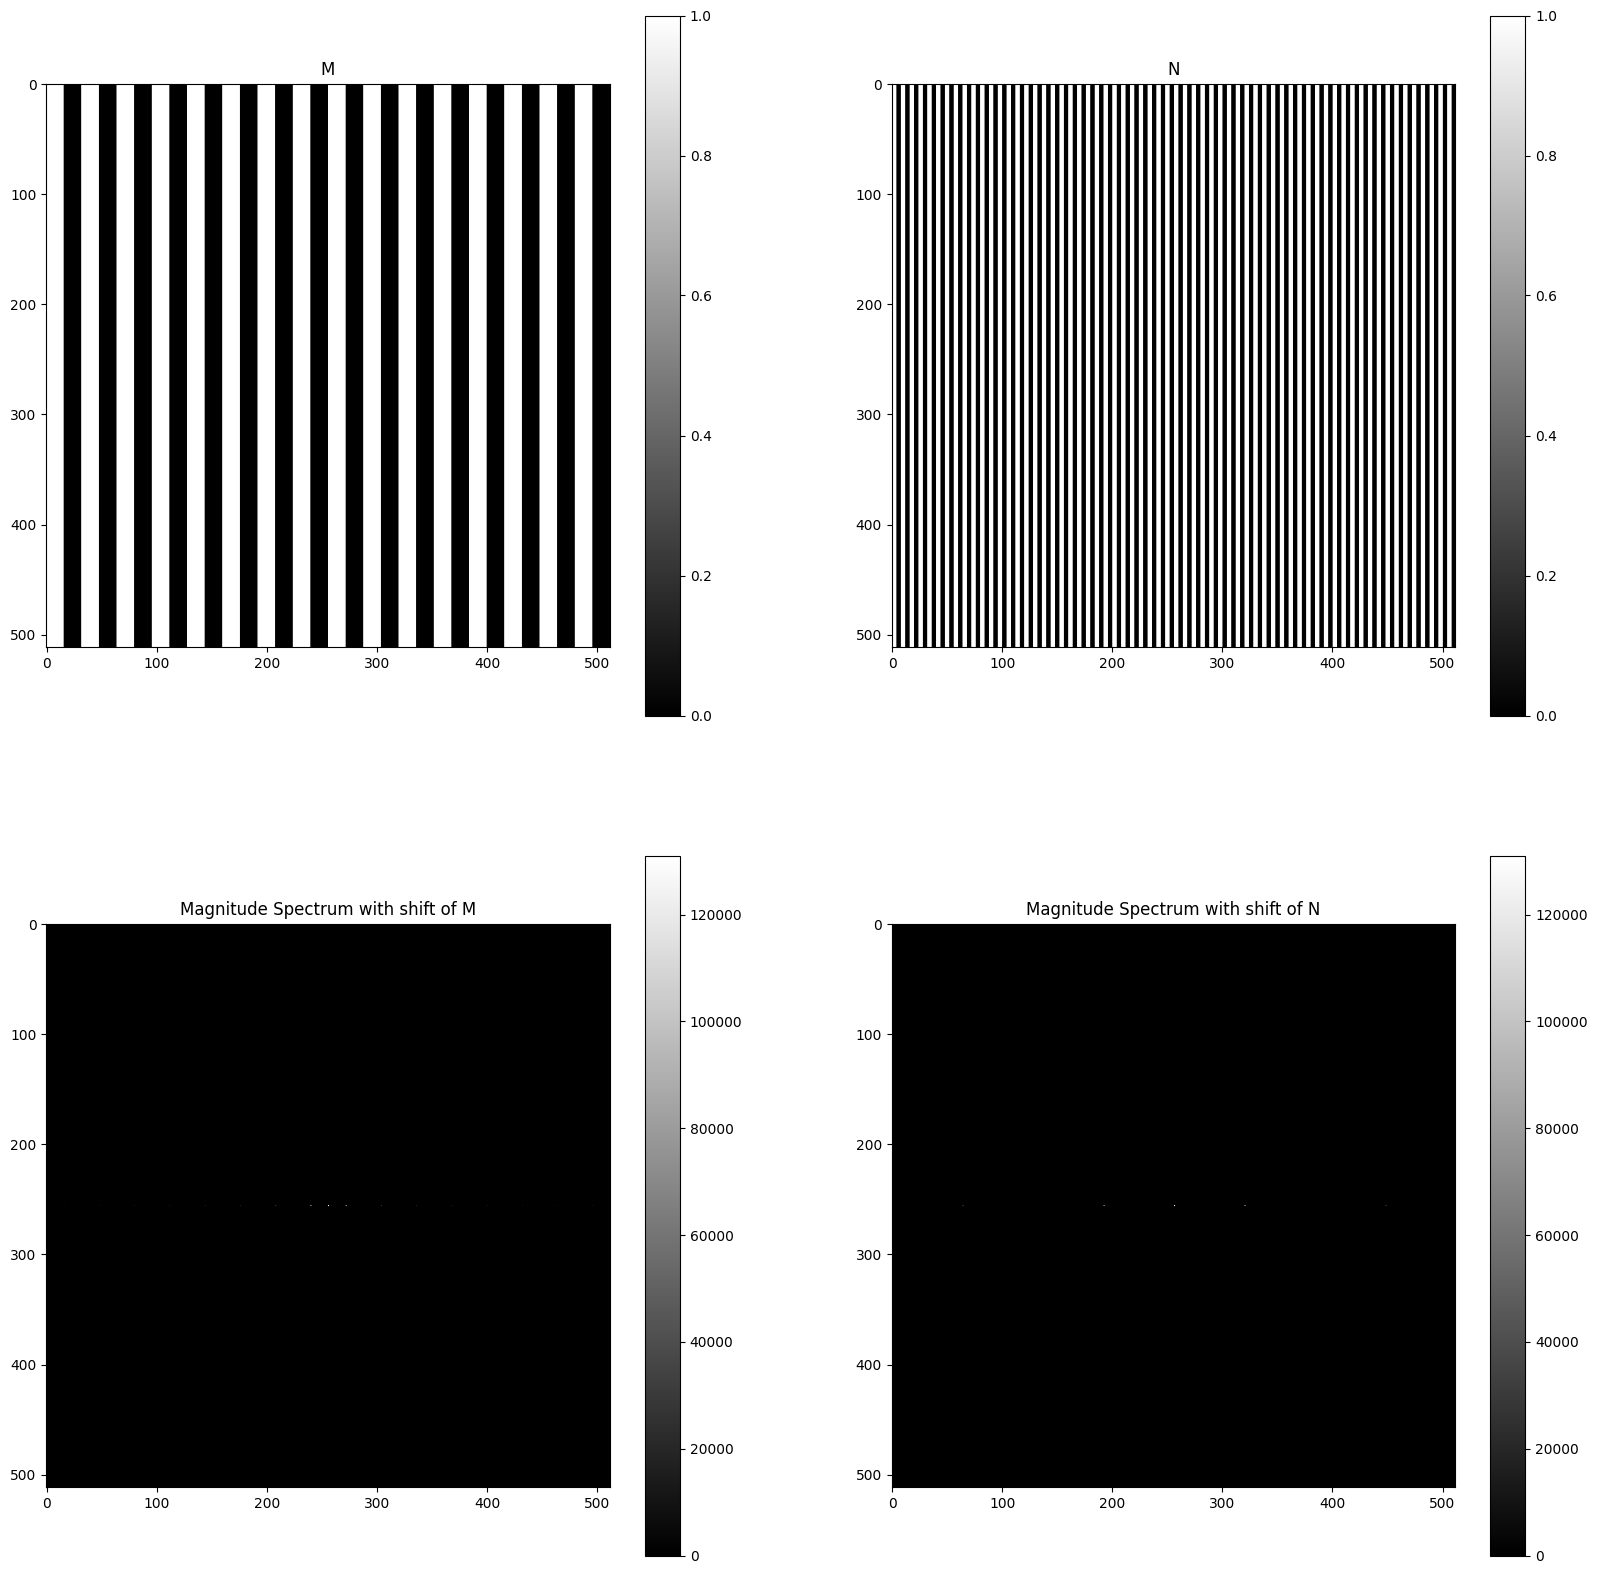

In [ ]:
# 3.

A = np.concatenate((np.ones([512,16]), np.zeros([512,16])), axis=1)
M = np.tile(A,(1,16))

B = np.concatenate((np.ones([512,4]), np.zeros([512,4])), axis=1)
N = np.tile(B,(1,64))

fft2_img_M = np.fft.fft2(M)
fft2_img_N = np.fft.fft2(N)

fft2_img_shift_M = np.fft.fftshift(fft2_img_M)
fft2_img_shift_N = np.fft.fftshift(fft2_img_N)

plt.figure(figsize=(20,20))

plt.subplot(221)
plt.imshow(M, cmap="gray")
plt.title("M")
plt.colorbar()

plt.subplot(222)
plt.imshow(N, cmap="gray")
plt.title("N")
plt.colorbar()

plt.subplot(223)
plt.imshow(
    np.abs(fft2_img_shift_M),
    cmap="gray")  # cmap = 'nipy_spectral'
plt.title("Magnitude Spectrum with shift of M")
plt.colorbar()

plt.subplot(224)
plt.imshow(
    np.abs(fft2_img_shift_N),
    cmap="gray")  # cmap = 'nipy_spectral'
plt.title("Magnitude Spectrum with shift of N")
plt.colorbar()
plt.show()

3. With images consisting of stripes, one can analyse more easily their Fourier transform. The high-intensity pixels are symmetric in the Fourier domain. These images are represented by a few high-intensity pixels in the Fourier domain along the horizontal line passing by the origin. This line in the Fourier domain that is perpendicular to the stripes in the spatial domain. The distance between the center point and the closest one in the Fourier domain is proportional to the width of the stripes in the spatial domain (cf. cell above).

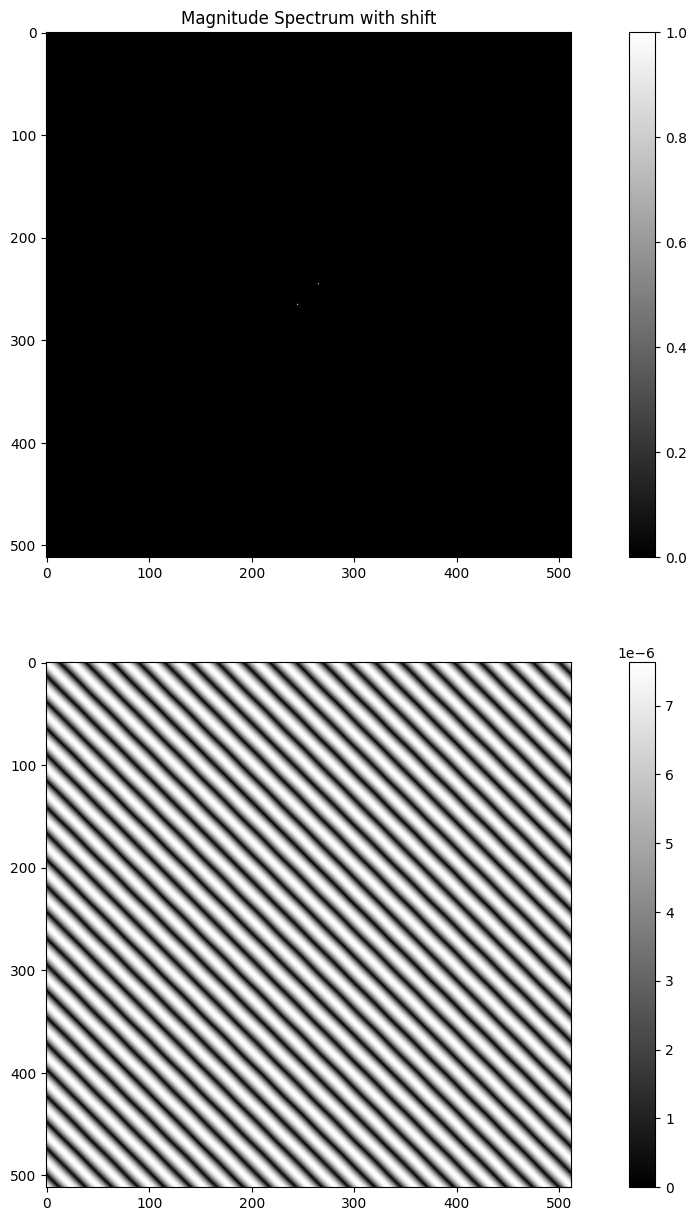

In [ ]:
# 4.

P = np.zeros([512,512])
gap = 10

P[255-gap,255+gap] = 1
P[255+gap,255-gap] = 1

plt.figure(figsize=(15, 15))

plt.subplot(211)
plt.imshow(P, cmap="gray")
plt.title("Magnitude Spectrum with shift")
plt.colorbar()

Q = np.abs(np.fft.ifft2(np.fft.ifftshift(P)))

plt.subplot(212)
plt.imshow(Q, cmap="gray")
plt.colorbar()
plt.show()

4. The reverse Fourier transform of two symmetric points consist of stripes perpendicular to the line passing by the symmetric points in the Fourier domain. The distance between those points in the Fourier domain is proportional to the width of the stripes in the spatial domain (cf. cell above).

----
### Exercise 2 <a name="exo2"></a> [(&#8593;)](#content)

Let us define 2 masks `h1` and `h2` directly in the Fourier domain.

In [ ]:
h1 = np.zeros([512, 512])
delta = 32
h1[256 - delta : 256 + delta, 256 - delta : 256 + delta] = 1
h2 = 1 - h1;

1. Load any image in a variable `R`. Reconstruct the images `S1` and `S2` obtained by computing the inverse Fourier transform of `h1*R_fft` and `h2*R_fft`, where `R_fft` contains the Fourier transform of `R`. Observe the result and comment your observations.

2. Which operation have you just encoded?

**Answers**

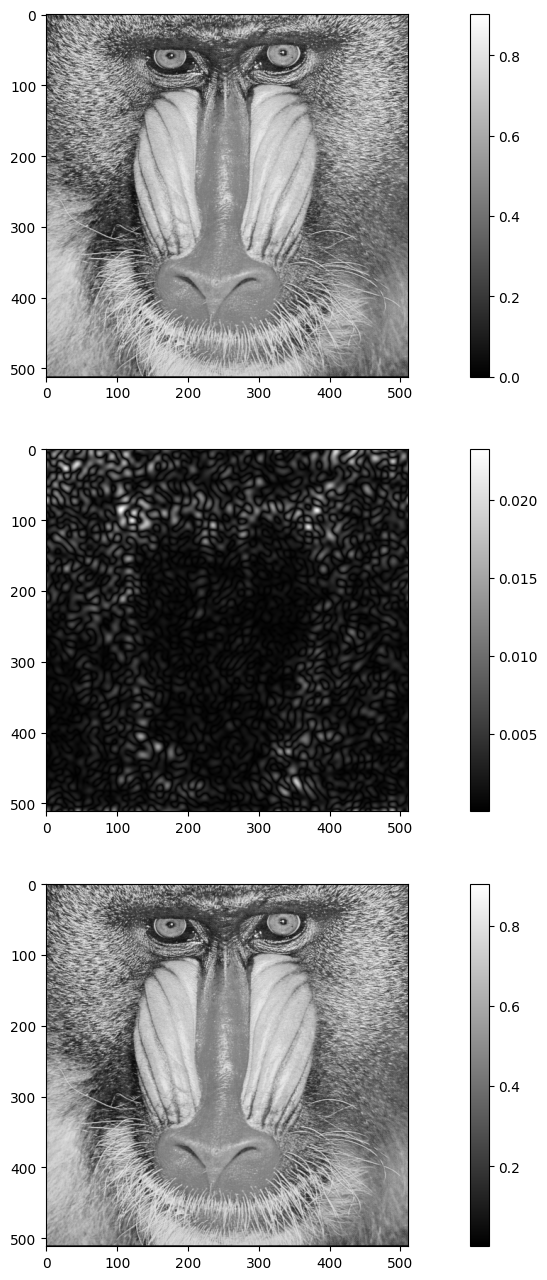

In [ ]:
# 1.

R = mpimg.imread("/content/mandrill.png")

R_ftt = np.fft.fft2(R)

S1 = np.fft.ifft2(h1*R_ftt)
S2 = np.fft.ifft2(h2*R_ftt)

plt.figure(figsize=(16,16))

plt.subplot(311)
plt.imshow(R, cmap="gray")
plt.colorbar()

plt.subplot(312)
plt.imshow(np.abs(S1), cmap="gray")
plt.colorbar()

plt.subplot(313)
plt.imshow(np.abs(S2), cmap="gray")
plt.colorbar()
plt.show()

1. S2 looks like R whereas S1 is very different but contains shapes that look familiar with R (cf. cell above).

2. The encoded operation of R into S1 and S2 seperates low-frequencies (S1) from high-frequencies (S2) of the image. The variable "delta" controls the threshold frequency.  